In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 3: Modelo Lineal

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [3]:
df = pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

Realice el preprocesamiento que considere adecuado para que las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__, __Embarked__ y __Survived__ puedan ser utilizadas por un modelo lineal.

In [4]:
# Obtenemos los atributos deseados
new_df = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

In [5]:
# Utilizamos un One Hot Encoder para los atributos 'Sex', 'Embarked'
ohe_sex = pd.get_dummies(new_df['Sex'], prefix = 'Sex')
ohe_embarked = pd.get_dummies(new_df['Embarked'], prefix = 'Embarked')
new_df = new_df.drop('Sex', axis = 1)
new_df = new_df.join(ohe_sex)
new_df = new_df.drop('Embarked', axis = 1)
new_df = new_df.join(ohe_embarked)

In [6]:
# Observamos las transformaciones en los atributos
new_df.dtypes

Pclass          int64
SibSp           int64
Parch           int64
Fare          float64
Survived        int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [7]:
# Imprimimos los primeros 10 registros
new_df.head(10)

,Pclass,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,0,0,1,0,0,1
1,1,1,0,71.2833,1,1,0,1,0,0
2,3,0,0,7.9250,1,1,0,0,0,1
3,1,1,0,53.1000,1,1,0,0,0,1
4,3,0,0,8.0500,0,0,1,0,0,1
5,3,0,0,8.4583,0,0,1,0,1,0
6,1,0,0,51.8625,0,0,1,0,0,1
7,3,3,1,21.0750,0,0,1,0,0,1
8,3,0,2,11.1333,1,1,0,0,0,1
9,2,1,0,30.0708,1,1,0,1,0,0


In [8]:
def calc_skewness(x) -> float:
    """
    Descripción:
    Esta funcion calcula el skewness de un atributo.
    
    Entradas:
    - x: Los samples de un atributo dado. 
            
    Salidas:
    - El cálculo de skewness.
    """
    return (((x-x.mean()) / x.var()**(1/2)) ** 3).mean()

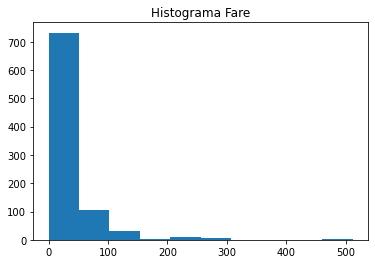

In [9]:
# Imprimimos el histograma de la columna 'Fare'
plt.hist(new_df['Fare'])
plt.title('Histograma Fare')
plt.show()

In [10]:
# Obtenemos skewness de la columna 'Fare'
calc_skewness(new_df['Fare'])

4.771209669373592

In [11]:
# Realizamos una transformación a la columna 'Fare'
new_df['Fare'] = new_df['Fare'] ** (1 / 2)

In [12]:
# Obtenemos el nuevo skewness
calc_skewness(new_df['Fare'])

2.0779894539935846

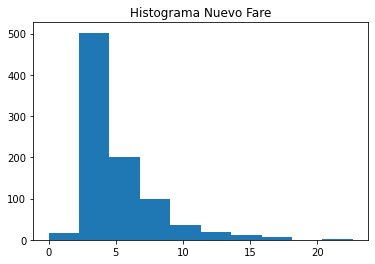

In [13]:
# Imprimimos el nuevo histograma
plt.hist(new_df['Fare'])
plt.title('Histograma Nuevo Fare')
plt.show()

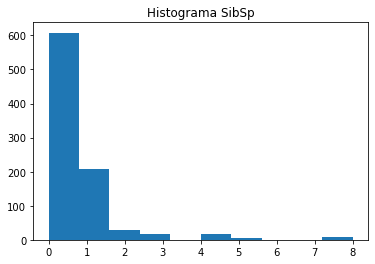

In [14]:
# Imprimimos el histograma de la columna 'SibSp'
plt.hist(new_df['SibSp'])
plt.title('Histograma SibSp')
plt.show()

In [15]:
# Obtenemos skewness de la columna 'SibSp'
calc_skewness(new_df['SibSp'])

3.682918775041469

In [16]:
# Realizamos una transformación a la columna 'SibSp'
new_df['SibSp'] = new_df['SibSp'] ** (1 / 2)

In [17]:
# Obtenemos el nuevo skewness
calc_skewness(new_df['SibSp'])

1.4316933042143771

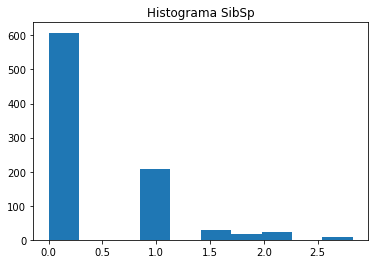

In [18]:
# Imprimimos el histograma de la columna 'SibSp' nuevo
plt.hist(new_df['SibSp'])
plt.title('Histograma SibSp')
plt.show()

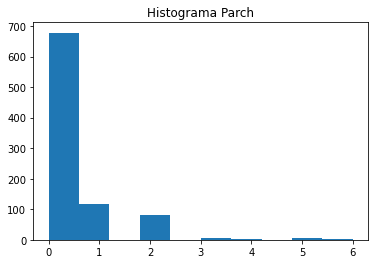

In [19]:
# Imprimimos el histograma de la columna 'Parch'
plt.hist(new_df['Parch'])
plt.title('Histograma Parch')
plt.show()

In [20]:
# Obtenemos skewness de la columna 'Parch'
calc_skewness(new_df['Parch'])

2.739867686513194

In [21]:
# Realizamos una transformación a la columna 'Parch'
new_df['Parch'] = new_df['Parch'] ** (1 / 2)

In [22]:
# Obtenemos skewness de la columna 'Parch'
calc_skewness(new_df['Parch'])

1.5246520886312096

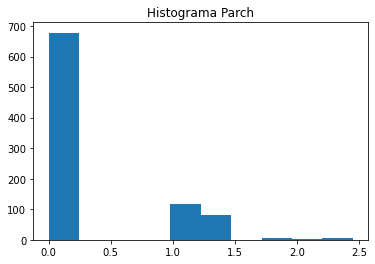

In [23]:
# Imprimimos el histograma de la columna 'Parch' nuevo
plt.hist(new_df['Parch'])
plt.title('Histograma Parch')
plt.show()

## Asignación 2 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir __Survived__ utilizando el algoritmo _pocket_. Imprima el error obtenido.

In [24]:
# Obtenemos X
X = new_df.drop('Survived', axis = 1).to_numpy()
# Obtenemos y
y = new_df['Survived'].to_numpy()

In [25]:
class PocketLinearClassifier:
    
    def __init__(self, learning_rate = 0.1, max_iterations = 100):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        
    def fit(self, X, y):
        # Agregamos una columna con valor uno a la matriz X
        X = np.insert(X, 0, 1, axis = 1)
        # Inicializamos un vector de ceros
        w = np.zeros(X.shape[1])
        # Inicializamos el mejor vecotr de pesos y le menor error de clasificación
        best_w = np.copy(w)
        best_error = len(X)
        # Iteramos el máximos nuemero de iteraciones
        for i in range(self.max_iterations):
            # Calculamos las clasificaciones predichas
            y_pred = np.sign(np.dot(X, w))
            y_pred[y_pred == -1] = 0
            # Calculamos el error de clasificación
            equals = np.array([1 if y_pred[i] == y[i] else 0 for i in range(len(y))])
            print("Error{}:".format(i), equals.sum() /  len(X))
            error = len(X) - np.sum(y == y_pred)
            if error < best_error:
                best_w = np.copy(w)
                best_error = error
            # Si no hay errore, terminamos el entrenamiento
            if error == 0:
                break
            # Calculamos el gradiente
            gradiente = -np.dot((y - y_pred), X)
            # Actualizamos el vector de pesos con el gradiente y el factor de aprendizaje
            w = w - self.learning_rate * gradiente
        self.coef_ = best_w
        return self
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis = 1)
        # Calculamos las clasifiaciones 
        y_pred = np.sign(np.dot(X, self.coef_))
        y_pred[y_pred == -1 ] = 0
        y_pred[y_pred == 1] = 1
        return y_pred

In [26]:
# Generamos nuestro objeto para entrenar
plr = PocketLinearClassifier()

In [27]:
# Entrenamos el clasificador
plr.fit(X, y)

Error0: 0.6161616161616161
Error1: 0.3838383838383838
Error2: 0.6161616161616161
Error3: 0.3984287317620651
Error4: 0.6161616161616161
Error5: 0.3984287317620651
Error6: 0.6161616161616161
Error7: 0.6386083052749719
Error8: 0.6161616161616161
Error9: 0.3995510662177329
Error10: 0.6161616161616161
Error11: 0.6464646464646465
Error12: 0.7104377104377104
Error13: 0.7025813692480359
Error14: 0.7104377104377104
Error15: 0.7003367003367004
Error16: 0.6408529741863075
Error17: 0.4006734006734007
Error18: 0.6161616161616161
Error19: 0.6689113355780022
Error20: 0.7104377104377104
Error21: 0.7081930415263749
Error22: 0.712682379349046
Error23: 0.6936026936026936
Error24: 0.6846240179573513
Error25: 0.6240179573512907
Error26: 0.6161616161616161
Error27: 0.40404040404040403
Error28: 0.6161616161616161
Error29: 0.6655443322109988
Error30: 0.7104377104377104
Error31: 0.7160493827160493
Error32: 0.712682379349046
Error33: 0.7025813692480359
Error34: 0.7171717171717171
Error35: 0.6689113355780022
Err

In [28]:
# Predeicmos
y_pred = plr.predict(X)

In [29]:
# Generamos las tablas
from tabulate import tabulate
table = [[y[i], y_pred[i]] for i in range(len(y))]
headers =  ['y', 'y_pred']
print(tabulate(table, headers, tablefmt = "github"))

|   y |   y_pred |
|-----|----------|
|   0 |        0 |
|   1 |        1 |
|   1 |        0 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        0 |
|   1 |        1 |
|   1 |        0 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   1 |        1 |
|   0 |        0 |
|   1 |        0 |
|   1 |        1 |
|   1 |        0 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   0 |        0 |
|   1 |        0 |
|   0 |        0 |
|   0 |        1 |
|   0 |        0 |
|   1 |        1 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   1 |        1 |
|   0 |        0 |
|   0 |        0 |
|   0 |     

## Asignación 3 &#x1F625;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Cabin__ y __Embarked__, entrene una regresión lineal para predecir __Fare__ utilizando el algoritmo de Ordinary Leasts Squares (OLS). Imprima el valor del error cuadrático medio (MSE).

In [30]:
# Obtenemos X
X = new_df.drop('Survived', axis = 1)
X = X.drop('Fare', axis = 1).to_numpy()
# Obtenemos y
y = new_df['Fare'].to_numpy()

In [31]:
class OrdinartLeastsSquares:
    
    def fit(self, X, y):
        #Agregamos una columna con valor uno a la matriz X
        X = np.insert(X, 0, 1, axis = 1)
        coef, res, _, __ = np.linalg.lstsq(X, y, rcond = None)
        self.coef_ = coef
        return self
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis = 1)
        # Realizamos las predicciones
        y_pred = X.dot(self.coef_)
        return y_pred
    
    def mse(self, y, y_pred):
        diff = y - y_pred
        diff = diff ** 2
        mse_result = diff.mean()
        return mse_result

In [32]:
ols = OrdinartLeastsSquares()

In [33]:
ols.fit(X, y)

In [34]:
ols.coef_

array([ 7.33298388, -2.208447  ,  1.01769869,  1.11283479,  3.81973503,
        3.51324885, -0.94561765, -1.60446699, -1.94549905])

In [35]:
y_pred = ols.predict(X)

In [36]:
y_pred

array([ 3.29309138,  9.01635296,  2.58187886,  8.01647156,  2.27539268,
        2.61642474,  6.69228669,  5.15093331,  4.15566491,  6.80790595,
        4.71241234,  6.99877286,  2.27539268,  5.78146561,  2.58187886,
        4.79032586,  5.76465692,  4.48383969,  3.59957755,  3.58176026,
        4.48383969,  4.48383969,  2.92291092,  6.69228669,  5.45741949,
        6.08795178,  3.27527408, 10.02877858,  2.92291092,  2.27539268,
        7.69216809,  9.01635296,  2.92291092,  4.48383969,  8.70986678,
        7.70998538,  3.27527408,  2.27539268,  4.02112216,  4.59945895,
        3.59957755,  5.80802456,  3.27527408,  8.381692  ,  2.92291092,
        2.27539268,  3.63412344,  2.92291092,  4.71451738,  3.59957755,
        5.42362486,  2.27539268,  9.01635296,  5.80802456,  8.80500287,
        6.69228669,  4.79032586,  3.27527408,  7.3818106 ,  6.12482219,
        3.27527408,  8.94427191,  7.70998538,  5.61188458,  7.69216809,
        5.40580756,  4.79032586,  2.27539268,  6.19106229,  3.71

In [37]:
ols.mse(y, y_pred)

3.5374641721099387

In [38]:
# Generamos las tablas
from tabulate import tabulate
table = [[y[i], y_pred[i]] for i in range(len(y))]
headers =  ['y', 'y_pred']
print(tabulate(table, headers, tablefmt = "github"))

|        y |   y_pred |
|----------|----------|
|  2.69258 |  3.29309 |
|  8.44294 |  9.01635 |
|  2.81514 |  2.58188 |
|  7.28697 |  8.01647 |
|  2.83725 |  2.27539 |
|  2.90832 |  2.61642 |
|  7.20156 |  6.69229 |
|  4.59075 |  5.15093 |
|  3.33666 |  4.15566 |
|  5.48368 |  6.80791 |
|  4.08656 |  4.71241 |
|  5.15267 |  6.99877 |
|  2.83725 |  2.27539 |
|  5.59241 |  5.78147 |
|  2.80253 |  2.58188 |
|  4       |  4.79033 |
|  5.39676 |  5.76466 |
|  3.60555 |  4.48384 |
|  4.24264 |  3.59958 |
|  2.68794 |  3.58176 |
|  5.09902 |  4.48384 |
|  3.60555 |  4.48384 |
|  2.83358 |  2.92291 |
|  5.95819 |  6.69229 |
|  4.59075 |  5.45742 |
|  5.60245 |  6.08795 |
|  2.68794 |  3.27527 |
| 16.2173  | 10.0288  |
|  2.80699 |  2.92291 |
|  2.80995 |  2.27539 |
|  5.26505 |  7.69217 |
| 12.1046  |  9.01635 |
|  2.78388 |  2.92291 |
|  3.24037 |  4.48384 |
|  9.06481 |  8.70987 |
|  7.2111  |  7.70999 |
|  2.68872 |  3.27527 |
|  2.83725 |  2.27539 |
|  4.24264 |  4.02112 |
|  3.35286 |  4.

|  2.78388 |  2.61642 |


## Asignación 4 &#x1F921;

Utilizando las características __Pclass__, __Sex__, __SibSp__, __Parch__, __Fare__, __Cabin__ y __Embarked__, entrene un clasificador lineal para predecir la probabilidad de supervivencia __Survived__ utilizando el algoritmo de gradiente descendente estocástico y la entropía cruzada como función de error. Imprima el arror en cada iteración del gradiente.

In [39]:
X = np.array(new_df.drop(columns = ['Survived']))
y = np.array(new_df['Survived'])

In [40]:
def E_in_log_reg_sgd(X, y, w):
    acum_sum = 0
    for i in range(X.shape[0]):
        acum_sum += np.log(1 + np.exp(X[i] @ w * y[i]))
    
    return acum_sum / X.shape[0]

In [41]:
def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

In [42]:
def cross_entropy_error(X, y, w):
    acum_sum = 0
    for i in range(X.shape[0]):
        acum_sum += (match_results(y[i], 1) * np.log(1 / sigmoid(X[i] @ w))) + (match_results(y[i], -1) * np.log(1 / (1 - sigmoid(X[i] @ w))))
    
    return acum_sum / X.shape[0]

In [43]:
def __random_fn_def__():
    def __random_fn__(shape):
        return np.zeros(shape)
    
    return __random_fn__
    
__random_fn__ = __random_fn_def__()

In [44]:
def match_results(a, b):
    if a != b:
        return 1
    else:
        return 0

In [45]:
def logistic_reg_sgd(X, y, lr, T = 100):
    N = X.shape[0]
    acum_sum = 0
    w_0 = __random_fn__((X.shape[1]))
    w = list()
    w.append(w_0)
    for i in range(T):
        print("Itera {}".format(i))
        indexes = [ind for ind in range(N)]
        badge_indexes = np.random.choice(indexes, 1, False)
        for j in badge_indexes:
            acum_sum += (y[j] * X[j]) / (1 + np.exp(y[j] * X[j] @ w[-1]))
        g_t = (- 1 / len(badge_indexes)) * acum_sum
        print(g_t)
        v_t = -1 * g_t
        w_next = w[-1] + lr * v_t
        print(w_next)
        w.append(w_next)
        acum_sum = 0
        e_in = E_in_log_reg_sgd(X, y, w_next)
        #print(e_in)
        cee = cross_entropy_error(X, y, w_next)
        print(cee)
    return w[-1]

In [46]:
logistic_reg_sgd(X, y, 0.01, 1000)

Itera 0
[-1.5        -0.         -0.5        -1.52888849 -0.5        -0.
 -0.         -0.         -0.5       ]
[0.015      0.         0.005      0.01528888 0.005      0.
 0.         0.         0.005     ]
1.147952621683017
Itera 1
[-0.9524734  -0.         -0.         -1.71709585 -0.4762367  -0.
 -0.         -0.         -0.4762367 ]
[0.02452473 0.         0.005      0.03245984 0.00976237 0.
 0.         0.         0.00976237]
1.1805991914489014
Itera 2
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.02452473 0.         0.005      0.03245984 0.00976237 0.
 0.         0.         0.00976237]
1.1805991914489014
Itera 3
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.02452473 0.         0.005      0.03245984 0.00976237 0.
 0.         0.         0.00976237]
1.1805991914489014
Itera 4
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.02452473 0.         0.005      0.03245984 0.00976237 0.
 0.         0.         0.00976237]
1.1805991914489014
Itera 5
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.02452473 0.         0.005  

1.9808494925268876
Itera 43
[-0.17596657 -0.         -0.         -0.89603449 -0.17596657 -0.
 -0.         -0.         -0.17596657]
[0.12547481 0.02294605 0.01466382 0.27355863 0.04113445 0.01732603
 0.01728425 0.00594299 0.03523324]
2.018662853374334
Itera 44
[-0.02645883 -0.         -0.02645883 -0.32777197 -0.02645883 -0.
 -0.         -0.         -0.02645883]
[0.1257394  0.02294605 0.01492841 0.27683634 0.04139904 0.01732603
 0.01728425 0.00594299 0.03549783]
2.0317753948900186
Itera 45
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.1257394  0.02294605 0.01492841 0.27683634 0.04139904 0.01732603
 0.01728425 0.00594299 0.03549783]
2.0317753948900186
Itera 46
[-0.02577884 -0.         -0.         -0.3193482  -0.02577884 -0.
 -0.         -0.         -0.02577884]
[0.12599718 0.02294605 0.01492841 0.28002983 0.04165683 0.01732603
 0.01728425 0.00594299 0.03575561]
2.0445342420144685
Itera 47
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.12599718 0.02294605 0.01492841 0.28002983 0.04165683 0.01732603
 

2.440482143449424
Itera 95
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.16706296 0.02724748 0.01907138 0.35822793 0.05451924 0.02332626
 0.02301002 0.00952346 0.04531203]
2.440482143449424
Itera 96
[-0.35672027 -0.11890676 -0.         -0.46813637 -0.11890676 -0.
 -0.         -0.11890676 -0.        ]
[0.17063016 0.02843655 0.01907138 0.36290929 0.05570831 0.02332626
 0.02301002 0.01071252 0.04531203]
2.4671184985228014
Itera 97
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.17063016 0.02843655 0.01907138 0.36290929 0.05570831 0.02332626
 0.02301002 0.01071252 0.04531203]
2.4671184985228014
Itera 98
[-0.01145104 -0.         -0.         -0.13280245 -0.01145104 -0.
 -0.01145104 -0.         -0.        ]
[0.17074467 0.02843655 0.01907138 0.36423731 0.05582282 0.02332626
 0.02312453 0.01071252 0.04531203]
2.4729075612824127
Itera 99
[-0.03021685 -0.03021685 -0.         -0.26468511 -0.03021685 -0.
 -0.03021685 -0.         -0.        ]
[0.17104684 0.02873872 0.01907138 0.36688417 0.05612499 0.02332626
 0

2.649599659284412
Itera 147
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.18595527 0.03079552 0.01956522 0.39793891 0.06162038 0.0250606
 0.02367806 0.01248318 0.05051975]
2.649599659284412
Itera 148
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.18595527 0.03079552 0.01956522 0.39793891 0.06162038 0.0250606
 0.02367806 0.01248318 0.05051975]
2.649599659284412
Itera 149
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.18595527 0.03079552 0.01956522 0.39793891 0.06162038 0.0250606
 0.02367806 0.01248318 0.05051975]
2.649599659284412
Itera 150
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.18595527 0.03079552 0.01956522 0.39793891 0.06162038 0.0250606
 0.02367806 0.01248318 0.05051975]
2.649599659284412
Itera 151
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.18595527 0.03079552 0.01956522 0.39793891 0.06162038 0.0250606
 0.02367806 0.01248318 0.05051975]
2.649599659284412
Itera 152
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.18595527 0.03079552 0.01956522 0.39793891 0.06162038 0.0250606
 0.02367806 0.01248318 0.05051975

2.8716922552414643
Itera 193
[-0.38404857 -0.         -0.         -0.35638199 -0.12801619 -0.
 -0.         -0.12801619 -0.        ]
[0.20997585 0.03156058 0.02181514 0.44179833 0.06766993 0.0299939
 0.02430637 0.01510517 0.0582523 ]
2.8952044223177515
Itera 194
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.20997585 0.03156058 0.02181514 0.44179833 0.06766993 0.0299939
 0.02430637 0.01510517 0.0582523 ]
2.8952044223177515
Itera 195
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.20997585 0.03156058 0.02181514 0.44179833 0.06766993 0.0299939
 0.02430637 0.01510517 0.0582523 ]
2.8952044223177515
Itera 196
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.20997585 0.03156058 0.02181514 0.44179833 0.06766993 0.0299939
 0.02430637 0.01510517 0.0582523 ]
2.8952044223177515
Itera 197
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.20997585 0.03156058 0.02181514 0.44179833 0.06766993 0.0299939
 0.02430637 0.01510517 0.0582523 ]
2.8952044223177515
Itera 198
[-0.20511146 -0.         -0.         -0.37681382 -0.10255573 -0.
 

3.2153506746832146
Itera 245
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.2386927  0.03532412 0.02543483 0.49786704 0.07597743 0.03472626
 0.02596791 0.0163327  0.06840307]
3.2153506746832146
Itera 246
[-0.07865392 -0.03932696 -0.         -0.20052895 -0.03932696 -0.
 -0.         -0.         -0.03932696]
[0.23947924 0.03571738 0.02543483 0.49987233 0.0763707  0.03472626
 0.02596791 0.0163327  0.06879634]
3.226479341990166
Itera 247
[-0.07767915 -0.03883957 -0.         -0.19804374 -0.03883957 -0.
 -0.         -0.         -0.03883957]
[0.24025603 0.03610578 0.02543483 0.50185277 0.0767591  0.03472626
 0.02596791 0.0163327  0.06918474]
3.237478768250028
Itera 248
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.24025603 0.03610578 0.02543483 0.50185277 0.0767591  0.03472626
 0.02596791 0.0163327  0.06918474]
3.237478768250028
Itera 249
[-0.06830267 -0.03415134 -0.04829728 -0.17990333 -0.03415134 -0.
 -0.         -0.         -0.03415134]
[0.24093906 0.03644729 0.0259178  0.5036518  0.07710061 0.0347262

3.3942037880341003
Itera 292
[-0.26072835 -0.         -0.         -0.24265953 -0.         -0.08690945
 -0.         -0.         -0.08690945]
[0.25734911 0.03734282 0.02716597 0.53072423 0.08037753 0.03828666
 0.02613995 0.01638762 0.07613663]
3.411642601580694
Itera 293
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.25734911 0.03734282 0.02716597 0.53072423 0.08037753 0.03828666
 0.02613995 0.01638762 0.07613663]
3.411642601580694
Itera 294
[-0.1428726  -0.0476242  -0.         -0.18749666 -0.0476242  -0.
 -0.         -0.0476242  -0.        ]
[0.25877783 0.03781906 0.02716597 0.5325992  0.08085377 0.03828666
 0.02613995 0.01686386 0.07613663]
3.423485752391877
Itera 295
[-0.00237807 -0.00237807 -0.00237807 -0.02504131 -0.00237807 -0.
 -0.00237807 -0.         -0.        ]
[0.25880162 0.03784284 0.02718975 0.53284961 0.08087755 0.03828666
 0.02616373 0.01686386 0.07613663]
3.4247031299341004
Itera 296
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.25880162 0.03784284 0.02718975 0.53284961 0.08087755 0

3.535598639736786
Itera 336
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.26991982 0.0410769  0.02953902 0.55081871 0.0841412  0.03931299
 0.02687384 0.01713897 0.07944138]
3.535598639736786
Itera 337
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.26991982 0.0410769  0.02953902 0.55081871 0.0841412  0.03931299
 0.02687384 0.01713897 0.07944138]
3.535598639736786
Itera 338
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.26991982 0.0410769  0.02953902 0.55081871 0.0841412  0.03931299
 0.02687384 0.01713897 0.07944138]
3.535598639736786
Itera 339
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.26991982 0.0410769  0.02953902 0.55081871 0.0841412  0.03931299
 0.02687384 0.01713897 0.07944138]
3.535598639736786
Itera 340
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.26991982 0.0410769  0.02953902 0.55081871 0.0841412  0.03931299
 0.02687384 0.01713897 0.07944138]
3.535598639736786
Itera 341
[-0.00149305 -0.00149305 -0.00211149 -0.01635551 -0.         -0.00149305
 -0.         -0.         -0.00149305]
[0.26993475 0.0410918

3.6021943768814024
Itera 381
[-0.00846552 -0.00846552 -0.         -0.06524491 -0.00846552 -0.
 -0.00846552 -0.         -0.        ]
[0.27592071 0.04312918 0.03016796 0.56260143 0.08629129 0.03974143
 0.02723094 0.01739331 0.08140849]
3.605445658596905
Itera 382
[-0.00950721 -0.         -0.00950721 -0.07050734 -0.00950721 -0.
 -0.         -0.         -0.00950721]
[0.27601578 0.04312918 0.03026303 0.56330651 0.08638637 0.03974143
 0.02723094 0.01739331 0.08150356]
3.6090074455719714
Itera 383
[-0.21854259 -0.         -0.         -0.20016508 -0.07284753 -0.
 -0.         -0.         -0.07284753]
[0.27820121 0.04312918 0.03026303 0.56530816 0.08711484 0.03974143
 0.02723094 0.01739331 0.08223203]
3.623500219978036
Itera 384
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.27820121 0.04312918 0.03026303 0.56530816 0.08711484 0.03974143
 0.02723094 0.01739331 0.08223203]
3.623500219978036
Itera 385
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.27820121 0.04312918 0.03026303 0.56530816 0.08711484 0.0397414

3.734662940327554
Itera 430
[-0.0137823  -0.         -0.         -0.03453094 -0.         -0.0045941
 -0.         -0.         -0.0045941 ]
[0.29062737 0.04497823 0.03053662 0.5830396  0.08961442 0.04208791
 0.02907199 0.01741883 0.08516819]
3.7366072977071325
Itera 431
[-0.20702387 -0.         -0.         -0.19211002 -0.06900796 -0.
 -0.         -0.06900796 -0.        ]
[0.29269761 0.04497823 0.03053662 0.5849607  0.0903045  0.04208791
 0.02907199 0.01810891 0.08516819]
3.750145208079134
Itera 432
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.29269761 0.04497823 0.03053662 0.5849607  0.0903045  0.04208791
 0.02907199 0.01810891 0.08516819]
3.750145208079134
Itera 433
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.29269761 0.04497823 0.03053662 0.5849607  0.0903045  0.04208791
 0.02907199 0.01810891 0.08516819]
3.750145208079134
Itera 434
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.29269761 0.04497823 0.03053662 0.5849607  0.0903045  0.04208791
 0.02907199 0.01810891 0.08516819]
3.750145208079134
Iter

3.826558211433793
Itera 479
[-0.05902743 -0.0278258  -0.         -0.09487332 -0.         -0.01967581
 -0.         -0.01967581 -0.        ]
[0.30108531 0.04570481 0.03103527 0.59812488 0.09181217 0.04410917
 0.02916288 0.0195706  0.08714455]
3.832448685328066
Itera 480
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.30108531 0.04570481 0.03103527 0.59812488 0.09181217 0.04410917
 0.02916288 0.0195706  0.08714455]
3.832448685328066
Itera 481
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.30108531 0.04570481 0.03103527 0.59812488 0.09181217 0.04410917
 0.02916288 0.0195706  0.08714455]
3.832448685328066
Itera 482
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.30108531 0.04570481 0.03103527 0.59812488 0.09181217 0.04410917
 0.02916288 0.0195706  0.08714455]
3.832448685328066
Itera 483
[-0.14799217 -0.         -0.         -0.1547578  -0.04933072 -0.
 -0.         -0.         -0.04933072]
[0.30256524 0.04570481 0.03103527 0.59967246 0.09230548 0.04410917
 0.02916288 0.0195706  0.08763785]
3.8432696132347823
Ite

3.9765353723665213
Itera 525
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.31603644 0.047891   0.03233849 0.62063261 0.09533478 0.04670807
 0.02990099 0.01987267 0.09222586]
3.9765353723665213
Itera 526
[-0.06743788 -0.02247929 -0.         -0.09376857 -0.02247929 -0.
 -0.         -0.         -0.02247929]
[0.31671082 0.04811579 0.03233849 0.6215703  0.09555957 0.04670807
 0.02990099 0.01987267 0.09245065]
3.98266617153233
Itera 527
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.31671082 0.04811579 0.03233849 0.6215703  0.09555957 0.04670807
 0.02990099 0.01987267 0.09245065]
3.98266617153233
Itera 528
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.31671082 0.04811579 0.03233849 0.6215703  0.09555957 0.04670807
 0.02990099 0.01987267 0.09245065]
3.98266617153233
Itera 529
[-0.16254995 -0.         -0.         -0.15432737 -0.         -0.05418332
 -0.         -0.         -0.05418332]
[0.31833631 0.04811579 0.03233849 0.62311357 0.09555957 0.0472499
 0.02990099 0.01987267 0.09299249]
3.994034886140642
Itera 

4.117192095984192
Itera 567
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.33037776 0.04893914 0.03331515 0.64298373 0.09954497 0.04843654
 0.03095618 0.02204966 0.09493235]
4.117192095984192
Itera 568
[-0.09318368 -0.         -0.         -0.16139887 -0.04659184 -0.
 -0.04659184 -0.         -0.        ]
[0.33130959 0.04893914 0.03331515 0.64459772 0.10001089 0.04843654
 0.03142209 0.02204966 0.09493235]
4.12701070779381
Itera 569
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.33130959 0.04893914 0.03331515 0.64459772 0.10001089 0.04843654
 0.03142209 0.02204966 0.09493235]
4.12701070779381
Itera 570
[-0.03888731 -0.01296244 -0.         -0.06370084 -0.01296244 -0.
 -0.         -0.01296244 -0.        ]
[0.33169847 0.04906876 0.03331515 0.64523473 0.10014051 0.04843654
 0.03142209 0.02217929 0.09493235]
4.13093958322298
Itera 571
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.33169847 0.04906876 0.03331515 0.64523473 0.10014051 0.04843654
 0.03142209 0.02217929 0.09493235]
4.13093958322298
Itera 572
[-0. -

4.187984496027707
Itera 614
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.3376176  0.04936115 0.03363391 0.65418572 0.10147216 0.0494903
 0.03211238 0.02268807 0.09611868]
4.187984496027707
Itera 615
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.3376176  0.04936115 0.03363391 0.65418572 0.10147216 0.0494903
 0.03211238 0.02268807 0.09611868]
4.187984496027707
Itera 616
[-0.00687925 -0.         -0.         -0.01723565 -0.         -0.00229308
 -0.         -0.         -0.00229308]
[0.3376864  0.04936115 0.03363391 0.65435808 0.10147216 0.04951323
 0.03211238 0.02268807 0.09614162]
4.188971996779126
Itera 617
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.3376864  0.04936115 0.03363391 0.65435808 0.10147216 0.04951323
 0.03211238 0.02268807 0.09614162]
4.188971996779126
Itera 618
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.3376864  0.04936115 0.03363391 0.65435808 0.10147216 0.04951323
 0.03211238 0.02268807 0.09614162]
4.188971996779126
Itera 619
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.3376864  0.04936115 

4.228935080826139
Itera 663
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.34256611 0.04960779 0.03394598 0.66023217 0.10276552 0.04998063
 0.03213959 0.02317617 0.09738706]
4.228935080826139
Itera 664
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.34256611 0.04960779 0.03394598 0.66023217 0.10276552 0.04998063
 0.03213959 0.02317617 0.09738706]
4.228935080826139
Itera 665
[-0.05548617 -0.         -0.         -0.08016744 -0.         -0.01849539
 -0.01849539 -0.         -0.        ]
[0.34312097 0.04960779 0.03394598 0.66103384 0.10276552 0.05016558
 0.03232455 0.02317617 0.09738706]
4.234051880902556
Itera 666
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.34312097 0.04960779 0.03394598 0.66103384 0.10276552 0.05016558
 0.03232455 0.02317617 0.09738706]
4.234051880902556
Itera 667
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.34312097 0.04960779 0.03394598 0.66103384 0.10276552 0.05016558
 0.03232455 0.02317617 0.09738706]
4.234051880902556
Itera 668
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.34312097 0.0496077

4.356406479602546
Itera 711
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.3555956  0.05012458 0.03488115 0.68011858 0.10591475 0.05218857
 0.033168   0.02402131 0.10087069]
4.356406479602546
Itera 712
[-0.13767206 -0.         -0.         -0.12338708 -0.04589069 -0.
 -0.04589069 -0.         -0.        ]
[0.35697232 0.05012458 0.03488115 0.68135245 0.10637365 0.05218857
 0.03362691 0.02402131 0.10087069]
4.365469653068272
Itera 713
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.35697232 0.05012458 0.03488115 0.68135245 0.10637365 0.05218857
 0.03362691 0.02402131 0.10087069]
4.365469653068272
Itera 714
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.35697232 0.05012458 0.03488115 0.68135245 0.10637365 0.05218857
 0.03362691 0.02402131 0.10087069]
4.365469653068272
Itera 715
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.35697232 0.05012458 0.03488115 0.68135245 0.10637365 0.05218857
 0.03362691 0.02402131 0.10087069]
4.365469653068272
Itera 716
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.35697232 0.05012458 0.0348

4.4333882557605255
Itera 756
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.36480782 0.05042251 0.0353013  0.6913875  0.10786822 0.05370452
 0.03372039 0.02443006 0.10337897]
4.4333882557605255
Itera 757
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.36480782 0.05042251 0.0353013  0.6913875  0.10786822 0.05370452
 0.03372039 0.02443006 0.10337897]
4.4333882557605255
Itera 758
[-0.0654013  -0.         -0.02180043 -0.07985241 -0.02180043 -0.
 -0.02180043 -0.         -0.        ]
[0.36546183 0.05042251 0.03551931 0.69218603 0.10808622 0.05370452
 0.03393839 0.02443006 0.10337897]
4.438769901908307
Itera 759
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.36546183 0.05042251 0.03551931 0.69218603 0.10808622 0.05370452
 0.03393839 0.02443006 0.10337897]
4.438769901908307
Itera 760
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.36546183 0.05042251 0.03551931 0.69218603 0.10808622 0.05370452
 0.03393839 0.02443006 0.10337897]
4.438769901908307
Itera 761
[-0.00109095 -0.         -0.         -0.00994853 -0.00109095 -0.

4.509019488739913
Itera 807
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.372478   0.05062461 0.03620743 0.70315529 0.11044112 0.05433302
 0.03399743 0.02521665 0.10551674]
4.509019488739913
Itera 808
[-0.11125392 -0.         -0.         -0.10439836 -0.         -0.03708464
 -0.         -0.         -0.03708464]
[0.37359054 0.05062461 0.03620743 0.70419927 0.11044112 0.05470387
 0.03399743 0.02521665 0.10588759]
4.516880678234176
Itera 809
[-0.12896762 -0.         -0.         -0.11558582 -0.         -0.04298921
 -0.04298921 -0.         -0.        ]
[0.37488022 0.05062461 0.03620743 0.70535513 0.11044112 0.05513376
 0.03442732 0.02521665 0.10588759]
4.525522344445198
Itera 810
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.37488022 0.05062461 0.03620743 0.70535513 0.11044112 0.05513376
 0.03442732 0.02521665 0.10588759]
4.525522344445198
Itera 811
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.37488022 0.05062461 0.03620743 0.70535513 0.11044112 0.05513376
 0.03442732 0.02521665 0.10588759]
4.525522344445

4.579120182429636
Itera 852
[-0.02856139 -0.00952046 -0.01346397 -0.04318451 -0.         -0.00952046
 -0.         -0.         -0.00952046]
[0.38103354 0.05116354 0.03691029 0.7138937  0.11163152 0.05627731
 0.03509165 0.02567549 0.10709838]
4.581993680054463
Itera 853
[-0.00071726 -0.         -0.         -0.00667088 -0.00071726 -0.
 -0.         -0.         -0.00071726]
[0.38104072 0.05116354 0.03691029 0.71396041 0.1116387  0.05627731
 0.03509165 0.02567549 0.10710555]
4.582333039866412
Itera 854
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.38104072 0.05116354 0.03691029 0.71396041 0.1116387  0.05627731
 0.03509165 0.02567549 0.10710555]
4.582333039866412
Itera 855
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.38104072 0.05116354 0.03691029 0.71396041 0.1116387  0.05627731
 0.03509165 0.02567549 0.10710555]
4.582333039866412
Itera 856
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.38104072 0.05116354 0.03691029 0.71396041 0.1116387  0.05627731
 0.03509165 0.02567549 0.10710555]
4.582333039866412
Iter

4.64187156122539
Itera 898
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.38619694 0.0516227  0.03751151 0.72360717 0.1134725  0.05682155
 0.03567237 0.02603379 0.10854457]
4.64187156122539
Itera 899
[-0.01348136 -0.         -0.         -0.06864807 -0.01348136 -0.
 -0.         -0.         -0.01348136]
[0.38633176 0.0516227  0.03751151 0.72429365 0.11360732 0.05682155
 0.03567237 0.02603379 0.10867938]
4.645565472298943
Itera 900
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.38633176 0.0516227  0.03751151 0.72429365 0.11360732 0.05682155
 0.03567237 0.02603379 0.10867938]
4.645565472298943
Itera 901
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.38633176 0.0516227  0.03751151 0.72429365 0.11360732 0.05682155
 0.03567237 0.02603379 0.10867938]
4.645565472298943
Itera 902
[-0.0071609  -0.00506352 -0.00358045 -0.02235991 -0.00358045 -0.
 -0.         -0.         -0.00358045]
[0.38640337 0.05167334 0.03754732 0.72451725 0.11364312 0.05682155
 0.03567237 0.02603379 0.10871519]
4.646850992957525
Itera 903
[-0.

4.705852307938872
Itera 943
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.39671387 0.0525734  0.03861037 0.73110875 0.11504262 0.05918013
 0.03567478 0.02637783 0.11212682]
4.705852307938872
Itera 944
[-0.10603602 -0.         -0.         -0.09503362 -0.03534534 -0.
 -0.03534534 -0.         -0.        ]
[0.39777423 0.0525734  0.03861037 0.73205908 0.11539607 0.05918013
 0.03602823 0.02637783 0.11212682]
4.712896780129292
Itera 945
[-0.0528671  -0.         -0.         -0.09530753 -0.         -0.02643355
 -0.         -0.         -0.02643355]
[0.3983029  0.0525734  0.03861037 0.73301216 0.11539607 0.05944446
 0.03602823 0.02637783 0.11239115]
4.718937952471373
Itera 946
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.3983029  0.0525734  0.03861037 0.73301216 0.11539607 0.05944446
 0.03602823 0.02637783 0.11239115]
4.718937952471373
Itera 947
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.3983029  0.0525734  0.03861037 0.73301216 0.11539607 0.05944446
 0.03602823 0.02637783 0.11239115]
4.718937952471373
Iter

4.762499057696166
Itera 989
[-0.0097864  -0.00326213 -0.00729435 -0.01827595 -0.00326213 -0.
 -0.         -0.         -0.00326213]
[0.40270881 0.05327784 0.03915154 0.73988264 0.11594737 0.06067507
 0.03643655 0.02651354 0.11362903]
4.763652139856165
Itera 990
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.40270881 0.05327784 0.03915154 0.73988264 0.11594737 0.06067507
 0.03643655 0.02651354 0.11362903]
4.763652139856165
Itera 991
[-0. -0. -0. -0. -0. -0. -0. -0. -0.]
[0.40270881 0.05327784 0.03915154 0.73988264 0.11594737 0.06067507
 0.03643655 0.02651354 0.11362903]
4.763652139856165
Itera 992
[-0.01929931 -0.0064331  -0.         -0.03161397 -0.0064331  -0.
 -0.         -0.0064331  -0.        ]
[0.4029018  0.05334217 0.03915154 0.74019878 0.1160117  0.06067507
 0.03643655 0.02657787 0.11362903]
4.765634624695653
Itera 993
[-0.0558646  -0.         -0.         -0.09816128 -0.0279323  -0.
 -0.         -0.0279323  -0.        ]
[0.40346045 0.05334217 0.03915154 0.74118039 0.11629102 0.06067507


array([0.40603972, 0.05345359, 0.03915154, 0.74413632, 0.11692473,
       0.06098002, 0.03643655, 0.02685719, 0.11456769])